# Simulated Annealing
## The algorithm

1. Set $k := 0$. Select initial point $\vec{x}^{(0)} \in \Omega$.
1. For $k > 0$:
    2. Pick a candidate point $ \vec{z}^{(k)} $ at random from $N(\vec{x}^{(k)})$,
    2. Toss a coin with probability of head equal to $ p(k, f(\vec{z}^{(k)}), f(\vec{x}^{(k)})) $.
    If head, then set $\vec{x}^{(k+1)} = \vec{z}^{(k)}$; else, set $ \vec{x}^{(k+1)} = \vec{x}^{(k)} $
    2. Set $k := k+1$
    2. If stopping criterion statisfied, then stop.
    

**Step C explained**  
For $ f(\vec{z}^{(k)}) \le f(\vec{x}^{(k)}) $ the acceptance probability is

$$
p(k, f(\vec{z}^{(k)}), f(\vec{x}^{(k)})) = 1
$$

For $ f(\vec{z}^{(k)}) > f(\vec{x}^{(k)}) $  

$$
p(k, f(\vec{z}^{(k)}), f(\vec{x}^{(k)})) = \exp\left(-\frac{f(\vec{z}^{(k)}) - f(\vec{x}^{(k)})}{T_k} \right)
$$

where

$$
T_k = \frac{\gamma}{\log(k+2)}; \quad \gamma > 0
$$

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def simulated_annealing(f, x0, alpha, gamma, kmax):
    k = 0
    x = x0
    xlist = [x]
    
    while k < kmax:
        x_k = x
        f_x_k = f(x_k)
        z = x_k + alpha * (2*np.random.rand(len(x)) - 1)
        f_z = f(z)
        
        if f_z < f_x_k:
            x = z
        else:
            cointoss = np.random.rand(1)
#             t_k = gamma/np.log(k+2)
            t_k = gamma / (1+0.0004*(k+1)**2)
            prob = np.exp(-(f_z - f_x_k)/t_k)
            if cointoss < prob:
                x = z
            else:
                x = x_k
        xlist.append(x)
        k += 1
#         print(f"iter: {k:3}\t x = {x}")
    return np.array(xlist)

Minimise 

$$
f(\vec{x}) = 2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - x_2
$$

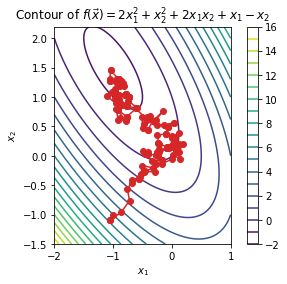

In [35]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - x2
    return ans

x0 = np.array([-1, -1])
X = simulated_annealing(f, x0, 0.2, 0.5, 150)

N = 100

x1_i = np.linspace(-2, 1, N)
x2_i = np.linspace(-1.5, 2.2, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - x2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = 2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - x_2$")
plt.axes().set_aspect("equal")

# Homework
Maximise

$$
f(\vec{x}) = 3(1-x_1)^2e^{-x_1^2 - (x_2+1)^2} - 10\left(\frac{x_1}{5} - x_1^3 - x_2^5\right)e^{-x_1^2-x_2^2} - \frac{e^{-(x_1+1)^2 - x_2^2}}{3}
$$

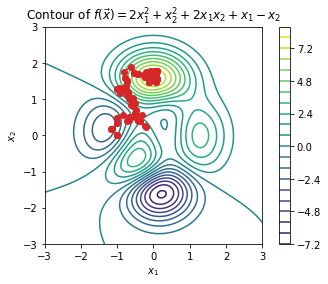

In [62]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    p1 = 3*(1-x1)**2*np.exp(-x1**2 - (x2+1)**2)
    p2 = 10*(x1/5 - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)
    p3 = (np.exp(-(x1+1)**2 - x2**2))/3
    ans = p1-p2-p3
    return -ans

x0 = np.array([-1, 0])
X = simulated_annealing(f, x0, 0.2, 0.9, 200)

N = 100

x1_i = np.linspace(-3, 3, N)
x2_i = np.linspace(-3, 3, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

p1 = 3*(1-x1)**2*np.exp(-x1**2 - (x2+1)**2)
p2 = 10*(x1/5 - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)
p3 = (np.exp(-(x1+1)**2 - x2**2))/3
f_vals = p1-p2-p3

plt.contour(x1, x2, f_vals, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = 2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - x_2$")
plt.axes().set_aspect("equal")

Text(0.5, 0, '$y$')

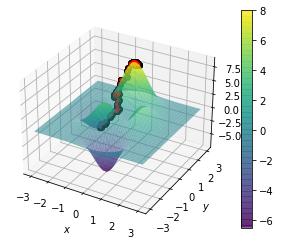

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure()
axes = fig.add_subplot(projection="3d")

surf = axes.plot_surface(x1, x2, f_vals, cmap=cm.viridis, alpha=0.6)
fig.colorbar(surf)

axes.scatter3D(X[:,0], X[:,1], -f( (X[:,0], X[:,1]) ), s=5, c="r")
axes.plot(X[:,0], X[:,1], -f( (X[:,0], X[:,1]) ), "ko")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

In [ ]:
f_vals